# Principal Component Analyis

Principal component analysis (PCA) is a dimensionality reduction technique that is widely used in data analysis. Reducing the dimensionality of a dataset can be useful in different ways. For example, our ability to visualize data is limited to 2 or 3 dimensions. Lower dimension can sometimes significantly reduce the computational time of some numerical algorithms. Besides, many statistical models suffer from high correlation between covariates, and PCA can be used to produce linear combinations of the covariates that are uncorrelated between each other.

In [1]:
data(iris)
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


We will apply PCA to the four continuous variables and use the categorical variable to visualize the PCs later.

In [2]:
log.ir <- (iris[, 1:4])
ir.species <- iris[, 5]
 
# apply PCA - scale. = TRUE is highly 
# advisable, but default is FALSE. 
ir.pca <- prcomp(log.ir,
                 center = TRUE,
                 scale. = TRUE) 

The prcomp function returns an object of class prcomp, which have some methods available. The print method returns the standard deviation of each of the four PCs, and their rotation (or loadings), which are the coefficients of the linear combinations of the continuous variables.

In [3]:
print(ir.pca)

Standard deviations:
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation:
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971


The plot method returns a plot of the variances (y-axis) associated with the PCs (x-axis). The Figure below is useful to decide how many PCs to retain for further analysis. In this simple case with only 4 PCs this is not a hard task and we can see that the first two PCs explain most of the variability in the data.

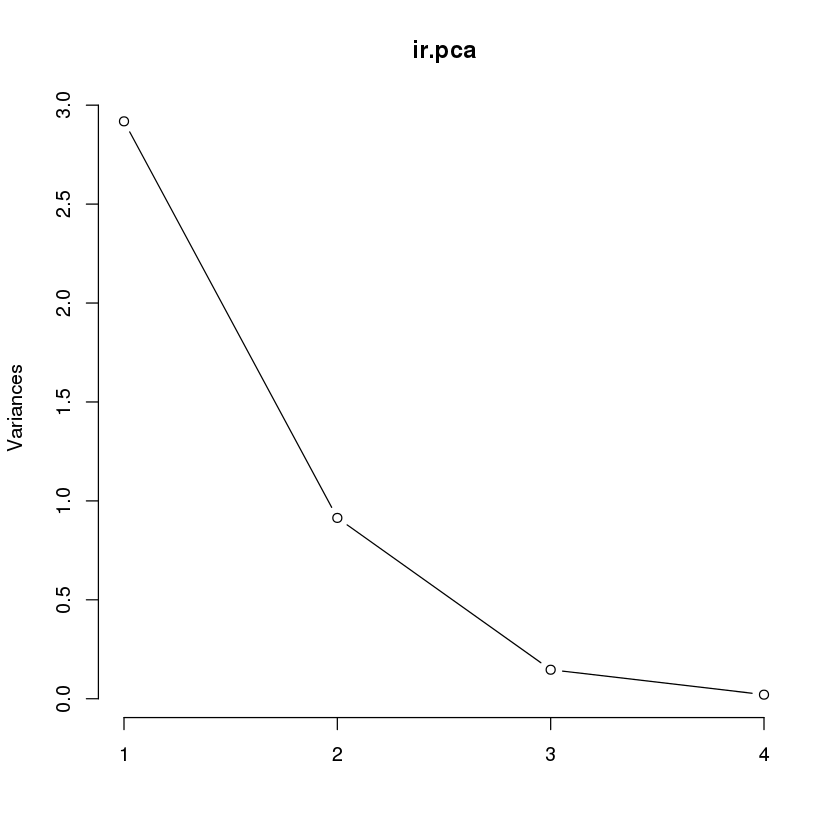

In [4]:
# plot method
plot(ir.pca, type = "l")

The summary method describe the importance of the PCs. The first row describe again the standard deviation associated with each PC. The second row shows the proportion of the variance in the data explained by each component while the third row describe the cumulative proportion of explained variance. We can see there that the first two PCs accounts for more than {95\%} of the variance of the data.

In [5]:
# summary method
summary(ir.pca)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

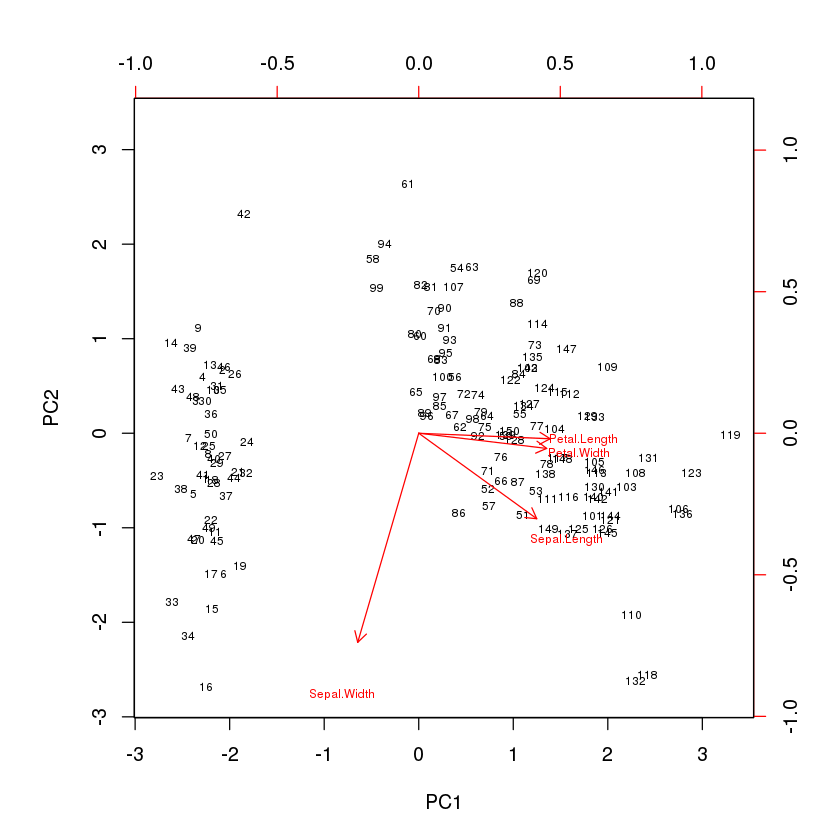

In [6]:
biplot(ir.pca, scale=0, cex=.6)